In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# MURA

In [2]:
import sys
sys.path.append("../../fastai/")

In [3]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from sklearn.metrics import confusion_matrix

In [4]:
PATH = "/home/sathiesh/Deep_Learning_Kaliy/my_projects/mura/data/"  #MMIV
#PATH = "/Users/Sathiesh/MachineLearning/Deep_Learning_Kaliy/my_projects/mura/data/" #Home

In [5]:
os.listdir(PATH)

['test_submission_example.csv',
 'models',
 'tmp',
 'MURA-v1.0',
 'valid.csv',
 'test',
 'cleaned_label.csv',
 'train.csv']

In [6]:
df_train = pd.read_csv(f'{PATH}train.csv')
df_valid = pd.read_csv(f'{PATH}valid.csv')

In [7]:
df_train.head()

,MURA-v1.0/train/XR_SHOULDER/patient00001/study1_positive/image1.png,1
0,MURA-v1.0/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.0/train/XR_SHOULDER/patient00001/study...,1
2,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1
3,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1
4,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1


In [8]:
df_train.columns = ['Image Index', 'Abnormality']

In [9]:
df_valid.columns = ['Image Index', 'Abnormality']

In [10]:
df_train.shape, df_valid.shape

((37110, 2), (3224, 2))

In [11]:
df = pd.concat([df_train, df_valid], ignore_index=True)
df.head()

,Image Index,Abnormality
0,MURA-v1.0/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.0/train/XR_SHOULDER/patient00001/study...,1
2,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1
3,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1
4,MURA-v1.0/train/XR_SHOULDER/patient00002/study...,1


In [12]:
df.shape

(40334, 2)

In [13]:
df['Abnormality'] = df['Abnormality'].astype('bool')

In [14]:
val_idxs = np.array(range(len(df_train), len(df)))

In [15]:
cleaned_label_path = f'{PATH}cleaned_label.csv'
df.to_csv(cleaned_label_path, index=False)

# View data

In [16]:
sz = 64
arch = dn169
bs = 16

In [17]:
def get_data(sz): 
    tfms = tfms_from_model(arch, sz, aug_tfms=RandomFlip())  #transforms_side_on
    return ImageClassifierData.from_csv(PATH ,'', cleaned_label_path , test_name='test',
                                       val_idxs=val_idxs, tfms=tfms, bs=bs);

In [18]:
data = get_data(sz)

In [19]:
fn = PATH+data.trn_ds.fnames[10]
fn 

'/home/sathiesh/Deep_Learning_Kaliy/my_projects/mura/data/MURA-v1.0/train/XR_ELBOW/patient00032/study1_negative/image2.png'

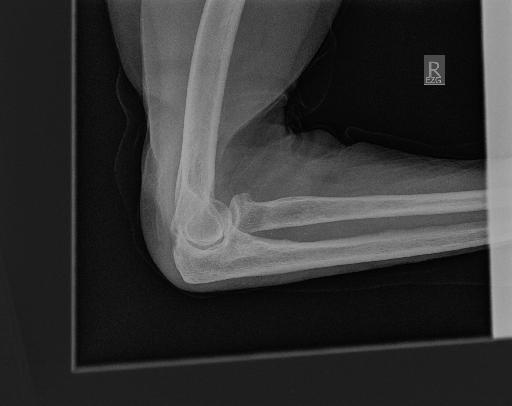

In [20]:
img = PIL.Image.open(fn);
img

In [21]:
data.trn_ds.fnames.shape ,data.val_ds.fnames.shape

((37110,), (3224,))

# Training

In [22]:
learn = ConvLearner.pretrained(arch, data, ps = 0.5, opt_fn=optim.Adam) 

 66%|██████▌   | 1529/2320 [03:50<01:59,  6.64it/s, loss=2.75] 

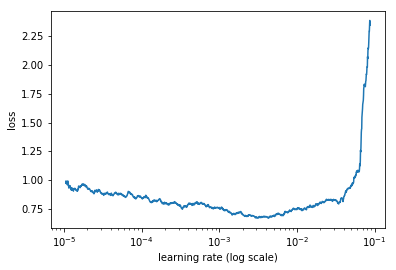

In [23]:
learn.lr_find()
learn.sched.plot()

In [24]:
lr = 0.00006

In [25]:
learn.fit(lr,3, cycle_len=1, cycle_mult =2) 

 66%|██████▌   | 1529/2320 [04:00<02:04,  6.37it/s, loss=2.75]The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


  6%|▌         | 143/2320 [00:09<02:23, 15.22it/s, loss=0.912]

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      0.73829    0.614884   0.672146  
    1      0.674735   0.604903   0.673387                      
    2      0.649722   0.579311   0.689826                      
    3      0.641217   0.585031   0.691998                      
    4      0.602913   0.593581   0.687035                      
    5      0.619038   0.574062   0.702543                      
    6      0.604775   0.579974   0.69665                       



[array([0.57997]), 0.6966501240694789]

 64%|██████▍   | 1496/2320 [00:49<00:27, 30.32it/s, loss=2.31] 

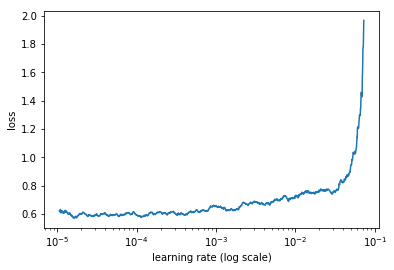

In [26]:
learn.lr_find()
learn.sched.plot()

In [27]:
lrs = [1e-5, 1e-4, 1e-3]
learn.unfreeze()

In [28]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

  0%|          | 1/2320 [00:00<15:23,  2.51it/s, loss=0.65]

Exception in thread Thread-13:
Traceback (most recent call last):
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      0.548806   0.540867   0.726737  
    1      0.501731   0.524821   0.752792                      
    2      0.480886   0.498576   0.766439                      
    3      0.522228   0.541025   0.738524                      
    4      0.502301   0.493524   0.772022                      
    5      0.464103   0.482427   0.775124                      
    6      0.426275   0.490584   0.777916                      



[array([0.49058]), 0.7779156327543424]

In [29]:
learn.save(f'{sz}')

In [30]:
sz = 128

In [31]:
learn.set_data(get_data(sz))
learn.freeze()

In [32]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.518103   0.529762   0.745658  
    1      0.485838   0.521563   0.748449                      
    2      0.498723   0.515585   0.752481                      
    3      0.493377   0.508137   0.756514                      
    4      0.519594   0.512658   0.757134                      
    5      0.480265   0.503444   0.759615                      
    6      0.509054   0.508283   0.757754                      



[array([0.50828]), 0.7577543424317618]

In [33]:
learn.unfreeze();
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.4566     0.45515    0.799628  
    1      0.471847   0.458954   0.796216                      
    2      0.430773   0.447403   0.807692                      
    3      0.458681   0.436913   0.807692                      
    4      0.393363   0.455372   0.809864                      
    5      0.369448   0.449903   0.811414                      
    6      0.338124   0.458966   0.807382                      



[array([0.45897]), 0.8073821339950372]

In [34]:
learn.save(f'{sz}')

In [35]:
sz = 256

In [36]:
learn.set_data(get_data(sz))
learn.freeze() 

In [37]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.510196   0.501302   0.771712  
    1      0.470398   0.477051   0.783189                      
    2      0.469614   0.472185   0.784119                      
    3      0.467266   0.477311   0.78536                       
    4      0.472679   0.466267   0.789392                      
    5      0.466479   0.461317   0.791253                      
    6      0.454383   0.46419    0.790943                      



[array([0.46419]), 0.7909429280397022]

In [38]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
#Hvis ikke overfitting her: 
learn.save(f'{sz}121')

epoch      trn_loss   val_loss   accuracy                      
    0      0.445979   0.421878   0.815136  
    1      0.430027   0.537077   0.815136                      
    2      0.378791   0.412827   0.827543                      
    3      0.423046   0.421497   0.822891                      
    4      0.366729   0.406922   0.833437                      
    5      0.325404   0.41981    0.828164                      
    6      0.282824   0.451394   0.824132                      



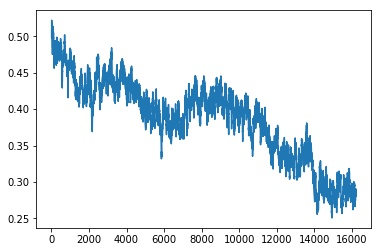

In [39]:
learn.sched.plot_loss()

# Transfer learning 

In [40]:
sz = 256
data = get_data(sz)

In [41]:
learnTL = ConvLearner.pretrained(arch, data, opt_fn=optim.Adam, ps = 0.5) 

In [42]:
learnTL.load('256169denne') #pretrained weights on chestX 14 dataset 

In [43]:
sz = 64

In [44]:
learnTL.set_data(get_data(sz))

 65%|██████▌   | 1518/2320 [00:49<00:26, 30.67it/s, loss=2.55] 

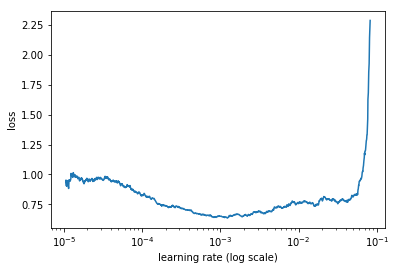

In [45]:
learnTL.lr_find()
learnTL.sched.plot()

In [46]:
lr = 0.0001

In [47]:
learnTL.fit(lr,3, cycle_len=1, cycle_mult =2) 

 12%|█▏        | 274/2320 [00:09<01:13, 27.96it/s, loss=0.834]

Exception in thread Thread-53:
Traceback (most recent call last):
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      0.657394   0.655621   0.611352  
    1      0.614378   0.634836   0.638648                      
    2      0.611284   0.616525   0.662221                      
    3      0.616256   0.609055   0.673387                      
    4      0.593594   0.595834   0.680211                      
    5      0.590402   0.589004   0.685484                      
    6      0.598009   0.588774   0.690136                      



[array([0.58877]), 0.690136476426799]

 65%|██████▍   | 1498/2320 [00:48<00:26, 30.70it/s, loss=2.19] 

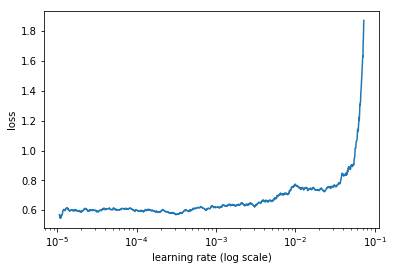

In [48]:
learnTL.lr_find()
learnTL.sched.plot()

In [49]:
lrs = [1e-6,1e-5,1e-4]
learnTL.unfreeze()

In [50]:
learnTL.fit(lrs, 3, cycle_len=1, cycle_mult=2)

  0%|          | 3/2320 [00:00<09:32,  4.05it/s, loss=0.752]

Exception in thread Thread-61:
Traceback (most recent call last):
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/sathiesh/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      0.585735   0.577605   0.701923  
    1      0.558721   0.545061   0.728288                      
    2      0.544541   0.541203   0.729529                      
    3      0.558049   0.537626   0.73263                       
    4      0.509338   0.532532   0.735732                      
    5      0.512283   0.514095   0.752481                      
    6      0.534094   0.523004   0.741935                      



[array([0.523]), 0.7419354838709677]

In [51]:
learnTL.save(f'{sz}TL')

In [52]:
sz = 128

In [53]:
learnTL.set_data(get_data(sz))
learnTL.freeze()

In [54]:
learnTL.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.54206    0.556892   0.718052  
    1      0.552528   0.547775   0.727667                      
    2      0.557624   0.541622   0.734491                      
    3      0.516293   0.546632   0.73294                       
    4      0.545134   0.533466   0.743176                      
    5      0.530756   0.534226   0.741315                      
    6      0.506712   0.533713   0.740695                      



[array([0.53371]), 0.7406947890818859]

In [55]:
learnTL.unfreeze()
learnTL.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.489845   0.508541   0.760856  
    1      0.485055   0.482397   0.772022                      
    2      0.483792   0.473894   0.779467                      
    3      0.484088   0.462762   0.788151                      
    4      0.428534   0.46467    0.791253                      
    5      0.41887    0.45944    0.787221                      
    6      0.4173     0.458374   0.793114                      



[array([0.45837]), 0.7931141439205955]

In [56]:
learnTL.save(f'{sz}TL')

In [57]:
sz = 256

In [58]:
learnTL.set_data(get_data(sz))
learnTL.freeze()

In [59]:
learnTL.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.494539   0.482716   0.773263  
    1      0.489654   0.4831     0.779156                      
    2      0.503785   0.478905   0.781328                      
    3      0.480103   0.473604   0.781328                      
    4      0.481912   0.467508   0.78536                       
    5      0.484352   0.470018   0.783499                      
    6      0.474154   0.470217   0.783189                      



[array([0.47022]), 0.7831885856079405]

In [60]:
learnTL.save(f'{sz}TL')

In [61]:
learnTL.unfreeze()
learnTL.fit(lrs,3, cycle_len=1, cycle_mult=2)
#learnTL.save(f'{sz}TL') hvis den ikke overfitter

epoch      trn_loss   val_loss   accuracy                      
    0      0.459763   0.451369   0.799628  
    1      0.439192   0.441914   0.801179                      
    2      0.425232   0.42857    0.80366                       
    3      0.433595   0.432661   0.809553                      
    4      0.407529   0.431212   0.811725                      
    5      0.391429   0.431898   0.812965                      
    6      0.374344   0.428866   0.815136                      



[array([0.42887]), 0.815136476426799]

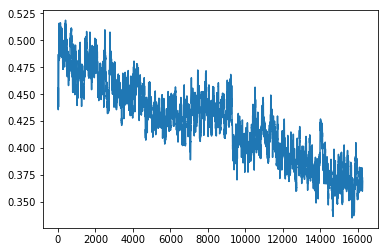

In [62]:
learnTL.sched.plot_loss()

# Prediction on test set

In [63]:
df_test = pd.read_csv(f'{PATH}test_submission_example.csv', header=None)

In [64]:
df_test.shape

(209, 2)

In [65]:
df_test.columns = ['Study','Abnormality']

In [66]:
df_test['Study'] = df_test['Study'].str.replace("/", "_")
df_test['Study'] = df_test['Study'].str.replace("test_","test/")

In [67]:
# maa lable y 
data.test_ds.y[:5] #alle er 0 

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [68]:
pos = 0; 
df_pos_img_indxs = {}
for stud in df_test['Study']: #eksempel: stud:  test/XR_FOREARM_patient12044_study1_
    indices = [i for i, s in enumerate(data.test_ds.fnames) if stud in s] #posisjonen til alle som 
    for j in indices:
        data.test_ds.y[j] = df_test['Abnormality'][pos]
    
    df_pos_img_indxs[pos] = indices
    pos= pos+1; 

In [69]:
data.test_ds.y[:5]

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [70]:
len(df_pos_img_indxs)

209

In [71]:
df_pos_img_indxs[0]

[56, 186, 253]

In [72]:
data.test_ds.y[56], data.test_ds.y[186], data.test_ds.y[253]

(array([1.]), array([1.]), array([1.]))

In [73]:
log_preds,y = learnTL.TTA(is_test=True)
probs = np.mean(np.exp(log_preds),0)
accuracy = accuracy_np(probs, y)

In [74]:
accuracy

0.5670840787119857

### Predict studies 

In [75]:
test_list = data.test_ds.fnames
len(test_list)

559

In [76]:
#fjerne imagex.png fra stringen, så man kan finne alle bildene for et studie
def searching_string(pasient_image_path):
    string_size = len(pasient_image_path) - len('image1.png')
    return pasient_image_path[:string_size] 

In [77]:
#finne indeksene til bildene som er med i studiet
def find_img_indxs(pasient_study): 
    return [test_list.index(i) for i in test_list if pasient_study in i]

In [78]:
trn_tfms, val_tfms = tfms_from_model(arch, sz) # get transformations
def predict_abnormality(fn): 
    im = open_image(fn)
    im_val = val_tfms(im)
    preds = learnTL.predict_array(im_val[None])
    return np.argmax(preds)

you should use the 2nd return val from tfms_from_model. The first one includes data augmentation, e.g. for the training set. For predictions you don’t want that, so use the 2nd one.
Jeremy

In [79]:
#fjerne indeksene til bildene fra test_list når man er ferdig med å predikere et studie. 
def del_indxs(study_img_indxs):
    #for i in study_img_indxs: 
       # del test_list[i] 
    return np.delete(test_list, study_img_indxs).tolist()

In [80]:
predictions_dict = {}

while(len(test_list)>0): 
    string_study = searching_string(test_list[0])
    study_img_indxs = find_img_indxs(string_study)
    
    prediction_list = [] #skal inneholde alle predikasjonene for et studie

    #Her skal det predikeres på hvert av bildene i studiet
    for i in study_img_indxs: 
        prediction = predict_abnormality(PATH+test_list[i])
        prediction_list.append(prediction)
        
    predictions_dict[string_study] = max(prediction_list) # nøkkel : navnet til studiet + value: predikasjonen (hvis en av de er True, så er studiet True)
    
    #ferdig med predikasjon for et studie
    test_list = del_indxs(study_img_indxs)
    #print(find_img_indxs(string_study)) #bare for å teste at alle listene som retuneres er tomme 

In [81]:
len(predictions_dict)

209

In [82]:
y = []
preds = []

In [83]:
def add_values(y_value, preds_value): 
    y.append(y_value)
    preds.append(preds_value)

In [84]:
def test_accuracy(pred_dict, df_test): 
    num_correct = 0; 
    for key, value in pred_dict.items(): 
        searching_string = key
        row = df_test.loc[df_test['Study'] == searching_string]
        print("Dictionary key: " + str(key) + " value: " + str(value))
        print(row.values[0][0],row.values[0][1])
        if(row.values[0][1] == value): 
            num_correct+=1
        
        add_values(row.values[0][1], value)
        print()
    return num_correct/len(pred_dict)

In [85]:
test_accuracy(predictions_dict, df_test)

Dictionary key: test/XR_SHOULDER_patient12168_study1_ value: 1
test/XR_SHOULDER_patient12168_study1_ 1

Dictionary key: test/XR_FINGER_patient12241_study1_ value: 1
test/XR_FINGER_patient12241_study1_ 1

Dictionary key: test/XR_ELBOW_patient12117_study1_ value: 1
test/XR_ELBOW_patient12117_study1_ 0

Dictionary key: test/XR_FOREARM_patient12056_study1_ value: 1
test/XR_FOREARM_patient12056_study1_ 0

Dictionary key: test/XR_SHOULDER_patient12183_study1_ value: 0
test/XR_SHOULDER_patient12183_study1_ 0

Dictionary key: test/XR_HAND_patient12092_study1_ value: 1
test/XR_HAND_patient12092_study1_ 1

Dictionary key: test/XR_FOREARM_patient12067_study1_ value: 0
test/XR_FOREARM_patient12067_study1_ 0

Dictionary key: test/XR_ELBOW_patient12124_study1_ value: 1
test/XR_ELBOW_patient12124_study1_ 1

Dictionary key: test/XR_HAND_patient12076_study1_ value: 0
test/XR_HAND_patient12076_study1_ 1

Dictionary key: test/XR_ELBOW_patient12128_study1_ value: 0
test/XR_ELBOW_patient12128_study1_ 0

Di

0.569377990430622

In [86]:
cm = confusion_matrix(y,preds);

[[54 35]
 [55 65]]


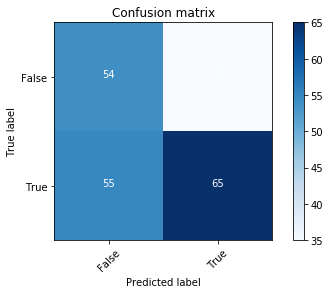

In [87]:
plot_confusion_matrix(cm, data.classes)